<a href="https://colab.research.google.com/github/buone2/ML-CODE/blob/main/k_nn(%EB%B0%98%EB%B3%B5%EB%AC%B8%20%EC%A0%81%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn import datasets
import matplotlib.pylab as plt 

digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [21]:
(x_digit, y_digit), (_, _15) = mnist.load_data()
x_digit, y_digit = x_digit[:5000], y_digit[:5000]
x_digit = x_digit.reshape(-1, 28*28)
x_digit.shape

(5000, 784)

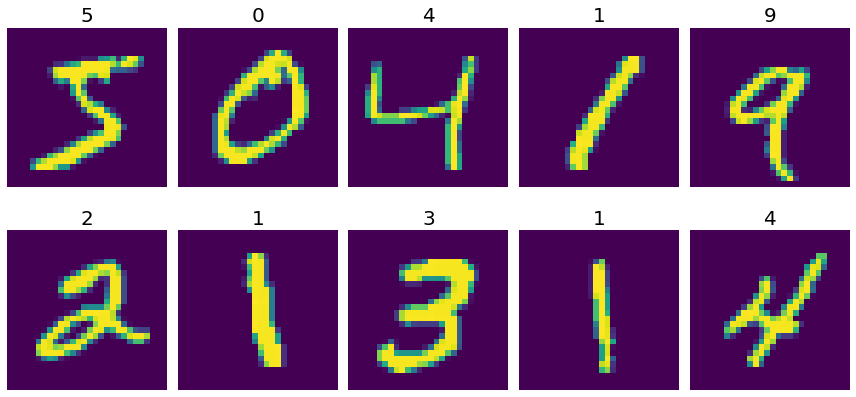

In [22]:
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w*h):
    axes[i//h, i%h].imshow(x_digit[i].reshape(-1, 28))
    axes[i//h, i%h].set_title(y_digit[i], fontsize=20)
    axes[i//h, i%h].axis('off')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_valid, y_train, y_valid = train_test_split(x_digit, y_digit, stratify=y_digit, random_state=30, test_size=0.1)

In [26]:
x_train.shape, x_valid.shape

((4500, 784), (500, 784))

In [63]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [64]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
prediction = knn.predict(x_valid)
(prediction == y_valid).mean()

0.938

In [66]:
knn.score(x_valid, y_valid)

0.938

In [62]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = knn.score(x_valid, y_valid)
    print('k: %d, accuracy: %.2f' % (k, score*100))

k: 1, accuracy: 95.60
k: 2, accuracy: 95.00
k: 3, accuracy: 94.60
k: 4, accuracy: 93.80
k: 5, accuracy: 93.80
k: 6, accuracy: 93.40
k: 7, accuracy: 93.40
k: 8, accuracy: 93.60
k: 9, accuracy: 92.80
k: 10, accuracy: 92.80
